Fluxograma para a Automação de Inventário e Estoque

In [11]:
import pandas as pd

# Caminho completo da planilha
caminho_arquivo = r'C:\Users\mycha\OneDrive\Área de Trabalho\teste\Fluxograma para a Automação de Inventário e Estoque\planilha_vendas_profissional - Copia.xlsx'

# Carregar a planilha
df = pd.read_excel(caminho_arquivo)

# Exibir as primeiras linhas para verificar
print(df.head())


   ID Venda Data da Venda    Produto  Quantidade Vendida  Valor Unitário (R$)  \
0         1    2025-04-01  Produto A                   3                   25   
1         2    2025-04-02  Produto B                   1                   15   
2         3    2025-04-03  Produto A                   5                   25   
3         4    2025-04-04  Produto C                   2                   30   
4         5    2025-04-05  Produto D                   1                   10   

   Valor Total (R$)  Estoque Inicial  Estoque Atual  Lucro por Venda (R$)  
0                75              100             97                    30  
1                15               50             49                    10  
2               125              100             95                    50  
3                60               75             73                    20  
4                10              200            199                     5  



1. Monitoramento e Atualização do Estoque


In [12]:
# Função para Monitoramento e Atualização do Estoque
def atualizar_estoque(df, produto, quantidade_vendida):
    # Procurar pelo produto na planilha
    produto_info = df[df['Produto'] == produto]
    
    if not produto_info.empty:
        # Subtrair a quantidade vendida do estoque atual
        estoque_atual = produto_info['Estoque Atual'].values[0]
        novo_estoque = estoque_atual - quantidade_vendida
        
        # Atualizar o estoque na planilha
        df.loc[df['Produto'] == produto, 'Estoque Atual'] = novo_estoque
        
        # Calcular o valor da venda
        valor_unitario = produto_info['Valor Unitário (R$)'].values[0]
        valor_total = valor_unitario * quantidade_vendida
        
        # Calcular o lucro da venda
        lucro = (valor_unitario - 10) * quantidade_vendida  # Assumindo um custo fixo de R$ 10 para cada produto
        
        # Atualizar o lucro na planilha
        df.loc[df['Produto'] == produto, 'Lucro por Venda (R$)'] = lucro
        
        return df, novo_estoque, valor_total, lucro
    else:
        print(f"Produto {produto} não encontrado!")
        return df, None, None, None

# Exemplo de uso:
produto = 'Produto A'
quantidade_vendida = 3
df, novo_estoque, valor_venda, lucro = atualizar_estoque(df, produto, quantidade_vendida)

if novo_estoque is not None:
    print(f"Novo estoque do {produto}: {novo_estoque}")
    print(f"Valor total da venda: R${valor_venda:.2f}")
    print(f"Lucro obtido com a venda: R${lucro:.2f}")


Novo estoque do Produto A: 94
Valor total da venda: R$75.00
Lucro obtido com a venda: R$45.00


2. Cálculos e Geração de Relatórios


In [13]:
# Função para Cálculos e Geração de Relatórios
def gerar_relatorio(df):
    # Cálculos do valor total de vendas e lucro total
    df['Valor Total (R$)'] = df['Quantidade Vendida'] * df['Valor Unitário (R$)']
    df['Lucro Total (R$)'] = df['Lucro por Venda (R$)'] * df['Quantidade Vendida']
    
    # Valor total de vendas e lucro total por produto
    total_vendas = df['Valor Total (R$)'].sum()
    total_lucro = df['Lucro Total (R$)'].sum()
    
    # Gerar relatório básico
    relatorio = {
        'Valor Total de Vendas (R$)': total_vendas,
        'Lucro Total (R$)': total_lucro,
        'Detalhes por Produto': df[['Produto', 'Quantidade Vendida', 'Valor Total (R$)', 'Lucro Total (R$)']],
    }
    
    return relatorio

# Exemplo de uso:
relatorio = gerar_relatorio(df)
print("Relatório de Vendas e Lucro")
print(f"Valor Total de Vendas: R${relatorio['Valor Total de Vendas (R$)']:.2f}")
print(f"Lucro Total: R${relatorio['Lucro Total (R$)']:.2f}")
print("\nDetalhes por Produto:")
print(relatorio['Detalhes por Produto'])


Relatório de Vendas e Lucro
Valor Total de Vendas: R$345.00
Lucro Total: R$495.00

Detalhes por Produto:
     Produto  Quantidade Vendida  Valor Total (R$)  Lucro Total (R$)
0  Produto A                   3                75               135
1  Produto B                   1                15                10
2  Produto A                   5               125               225
3  Produto C                   2                60                40
4  Produto D                   1                10                 5
5  Produto B                   4                60                80


Geração de Gráficos e Visualização



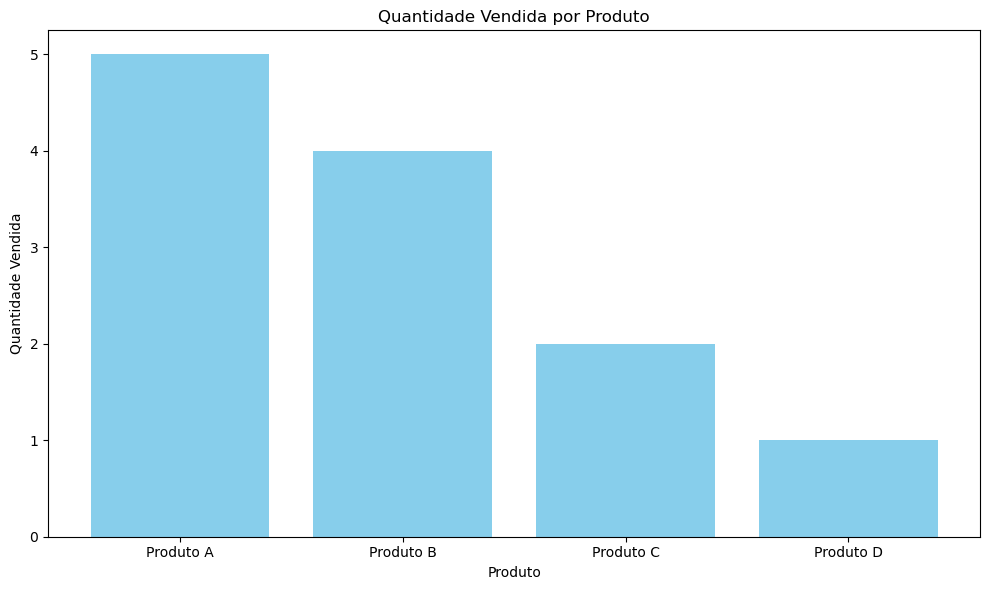

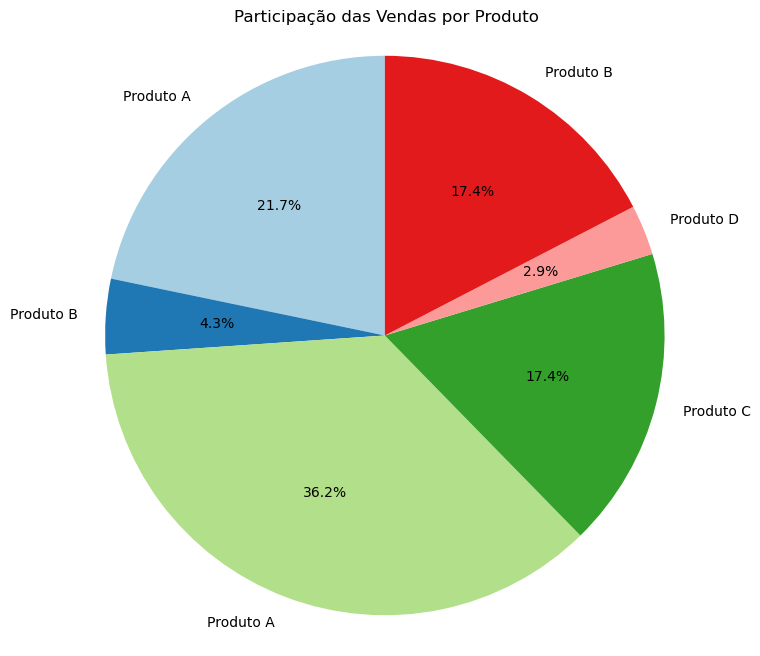

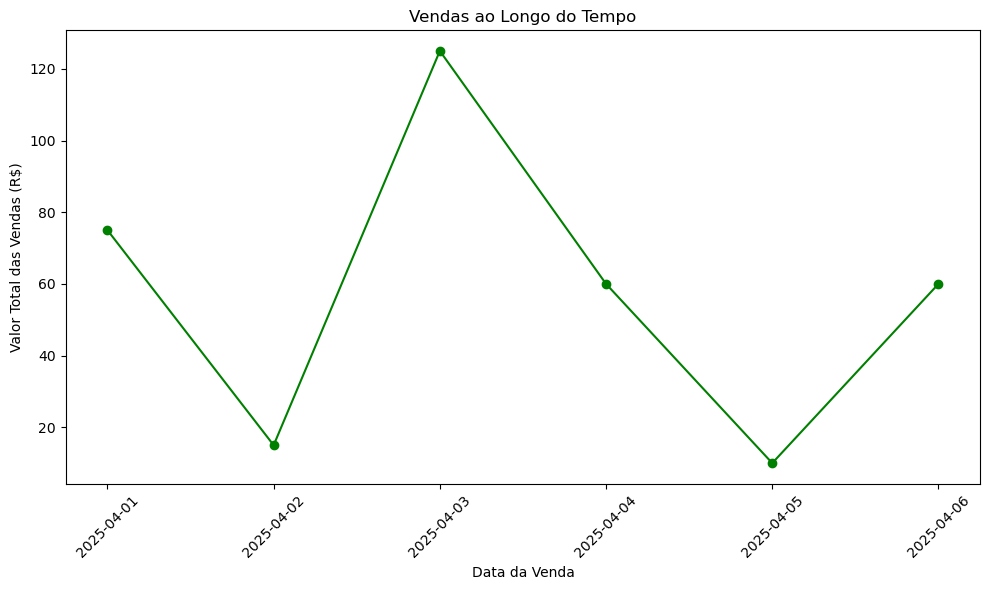

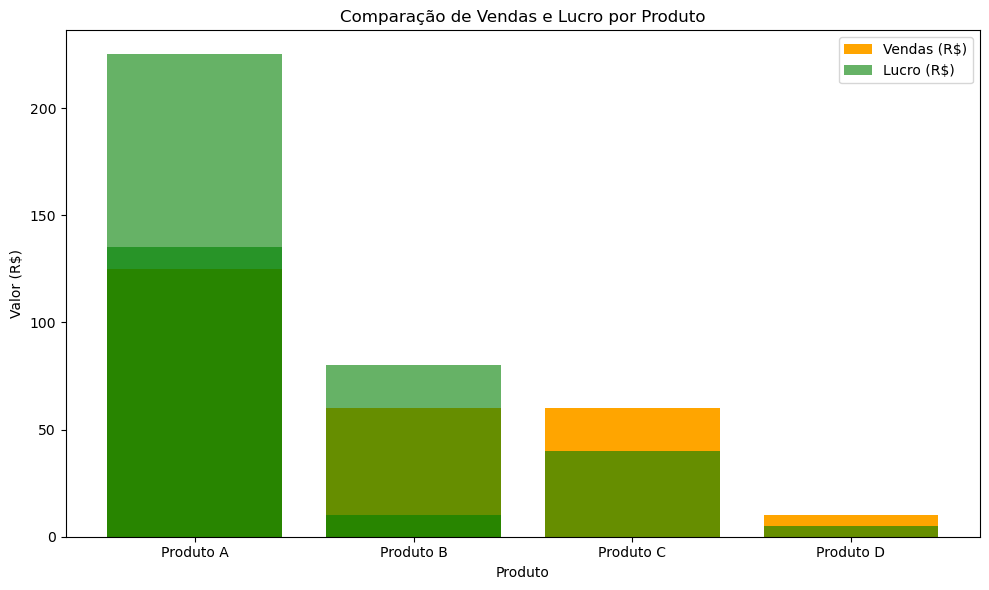

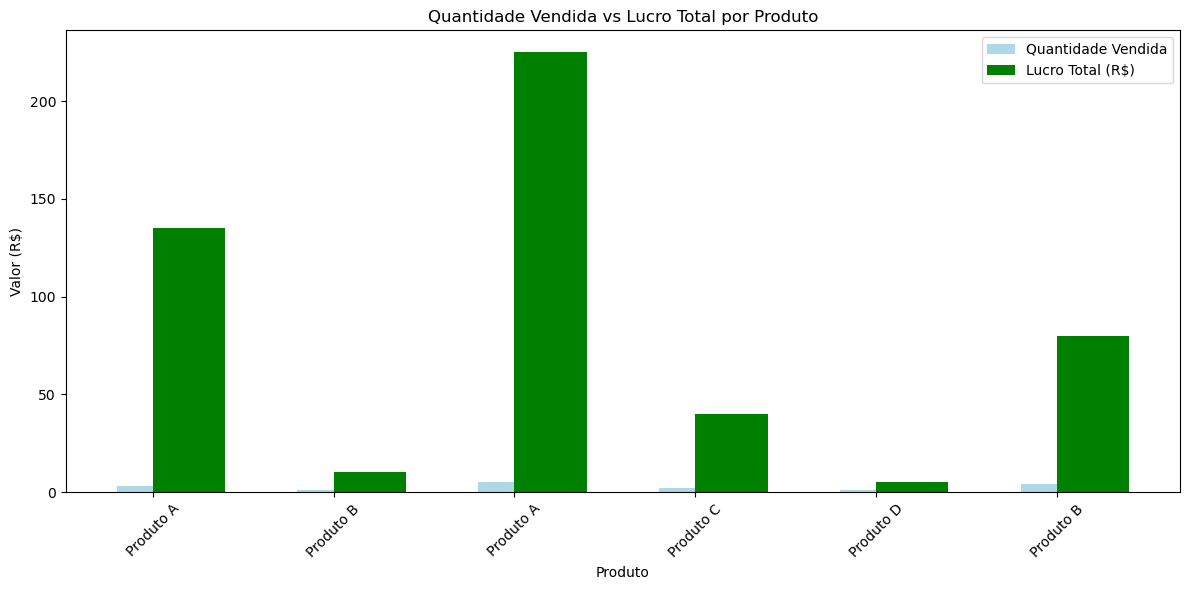

In [14]:
import matplotlib.pyplot as plt

# Função para gerar os gráficos
def gerar_graficos(df):
    # Gráfico de Barras - Quantidade Vendida por Produto
    plt.figure(figsize=(10,6))
    plt.bar(df['Produto'], df['Quantidade Vendida'], color='skyblue')
    plt.title('Quantidade Vendida por Produto')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade Vendida')
    plt.tight_layout()
    plt.show()

    # Gráfico de Pizza - Participação percentual das vendas
    plt.figure(figsize=(8,8))
    vendas_totais = df['Valor Total (R$)']
    plt.pie(vendas_totais, labels=df['Produto'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Participação das Vendas por Produto')
    plt.axis('equal')  # Torna o gráfico circular
    plt.show()

    # Gráfico de Linhas - Vendas ao Longo do Tempo (Data)
    plt.figure(figsize=(10,6))
    df['Data da Venda'] = pd.to_datetime(df['Data da Venda'])
    vendas_ao_tempo = df.groupby('Data da Venda')['Valor Total (R$)'].sum()
    plt.plot(vendas_ao_tempo.index, vendas_ao_tempo.values, marker='o', linestyle='-', color='green')
    plt.title('Vendas ao Longo do Tempo')
    plt.xlabel('Data da Venda')
    plt.ylabel('Valor Total das Vendas (R$)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Gráfico de Barras Empilhadas - Comparando Vendas e Lucro
    fig, ax = plt.subplots(figsize=(10,6))
    produtos = df['Produto']
    vendas = df['Valor Total (R$)']
    lucro = df['Lucro Total (R$)']
    ax.bar(produtos, vendas, label='Vendas (R$)', color='orange')
    ax.bar(produtos, lucro, label='Lucro (R$)', color='green', alpha=0.6)
    plt.title('Comparação de Vendas e Lucro por Produto')
    plt.xlabel('Produto')
    plt.ylabel('Valor (R$)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gráfico de Barras Duplas - Quantidade Vendida vs Lucro Total por Produto
    plt.figure(figsize=(12,6))
    
    # Configurando as posições para as barras
    x = range(len(df))  # Posições no eixo X
    
    # Barra para Quantidade Vendida
    plt.bar(x, df['Quantidade Vendida'], width=0.4, label='Quantidade Vendida', color='lightblue', align='center')
    
    # Barra para Lucro Total
    plt.bar(x, df['Lucro Total (R$)'], width=0.4, label='Lucro Total (R$)', color='green', align='edge')
    
    # Títulos e Rótulos
    plt.title('Quantidade Vendida vs Lucro Total por Produto')
    plt.xlabel('Produto')
    plt.ylabel('Valor (R$)')
    plt.xticks(x, df['Produto'], rotation=45)  # Coloca o nome do produto no eixo X com rotação para melhor visualização
    plt.legend()
    plt.tight_layout()  # Ajusta o layout para que não sobreponha os elementos
    plt.show()

# Gerar os gráficos
gerar_graficos(df)
